In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [25]:
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train['Age_imputed']= X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [27]:
X_train['Age_imputed'][X_train['Age_imputed'].isna()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isna()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [18]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,45.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [28]:
X_train['Age_imputed'].isna().sum()

0

C:\Users\Musadaq Tanvir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Musadaq Tanvir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


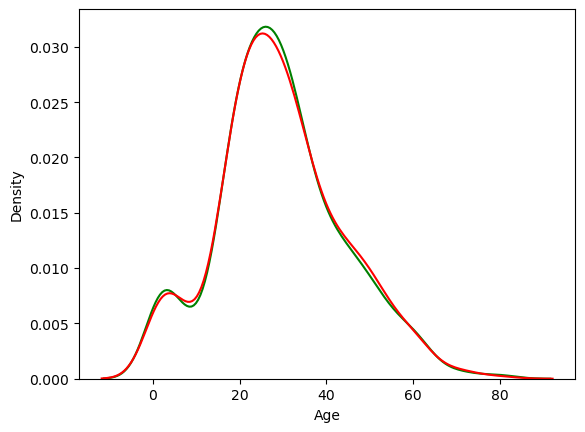

In [30]:
sns.distplot(X_train['Age_imputed'],hist=False,color='green')
sns.distplot(X_train['Age'],hist=False,color='red')
plt.show()

In [31]:
X_train['Age'].var()

210.2517072477438

In [32]:
X_train['Age_imputed'].var()

210.15789259944057

In [33]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,60.794446
Age,71.580633,210.251707,210.251707
Age_imputed,60.794446,210.251707,210.157893


<AxesSubplot:>

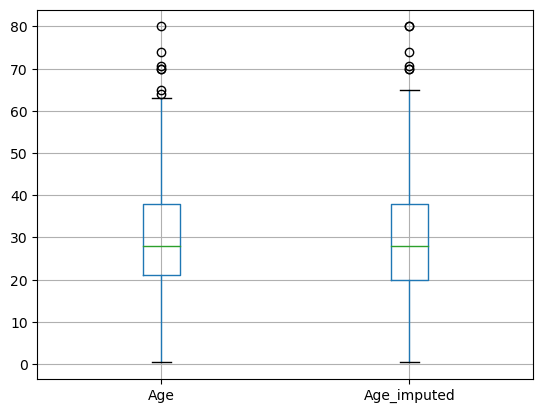

In [34]:
X_train[['Age','Age_imputed']].boxplot()

In [37]:
#sampled_value = X_train['Age'].dropna().sample(1,random_state=int(X_train['Fare']))